
0: 384x640 1 Placa, 45.8ms
Speed: 1.6ms preprocess, 45.8ms inference, 0.6ms postprocess per image at shape (1, 3, 384, 640)


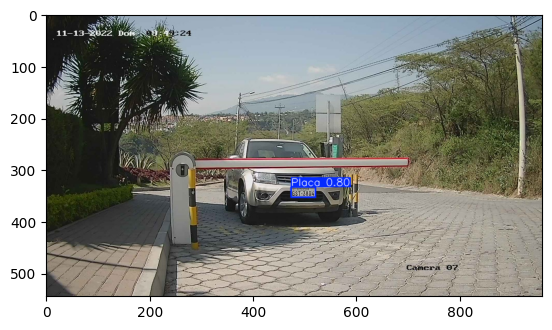

In [27]:
from PIL import Image
import matplotlib.pyplot as plt
from ultralytics import YOLO
import cv2
model_placa=YOLO("../Placas/runs/detect/yolo11_obb_custom/weights/best.pt")

img=Image.open("../Placas/data/images/val/fe36a5a3-Santa_Rosa_139.jpg").convert("RGB")

results=model_placa.predict(img,conf=0.5)
for result in results:
    img_result=result.plot()
    img_result=cv2.cvtColor(img_result, cv2.COLOR_BGR2RGB)
    points=result.boxes.xyxy.cpu().numpy()
%matplotlib inline
plt.imshow(img_result)


Points: [[     474.04      333.38      521.83      353.93]]


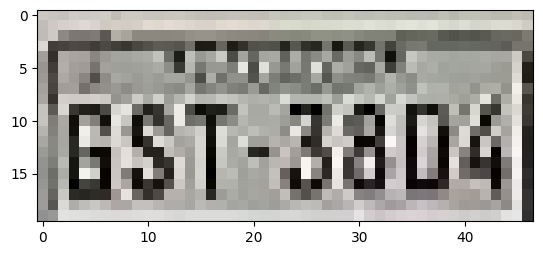

In [28]:
import numpy as np
print("Points:", points)
img_placa_or=np.array(img)
img_placa = img_placa_or[int(points[0][1]):int(points[0][3]), int(points[0][0]):int(points[0][2])]

plt.imshow(img_placa)


In [ ]:
import numpy as np

CHARS = ['京', '沪', '津', '渝', '冀', '晋', '蒙', '辽', '吉', '黑',
     '苏', '浙', '皖', '闽', '赣', '鲁', '豫', '鄂', '湘', '粤',
     '桂', '琼', '川', '贵', '云', '藏', '陕', '甘', '青', '宁',
     '新',
     '0', '1', '2', '3', '4', '5', '6', '7', '8', '9',
     
     
     'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V',
     'W', 'X', 'Y', 'Z', 'I', 'O', '-'
     ]

def decode(preds, CHARS):
    # greedy decode
    pred_labels = list()
    labels = list()
    for i in range(preds.shape[0]):
        pred = preds[i, :, :]
        pred_label = list()
        for j in range(pred.shape[1]):
            pred_label.append(np.argmax(pred[:, j], axis=0))
        no_repeat_blank_label = list()
        pre_c = pred_label[0]
        for c in pred_label: # dropout repeate label and blank label
            if (pre_c == c) or (c == len(CHARS) - 1):
                if c == len(CHARS) - 1:
                    pre_c = c
                continue
            no_repeat_blank_label.append(c)
            pre_c = c
        pred_labels.append(no_repeat_blank_label)
        
    for i, label in enumerate(pred_labels):
        lb = ""
        for i in label:
            lb += CHARS[i]
        labels.append(lb)
    return labels, pred_labels

PlACA: 云SS8D4


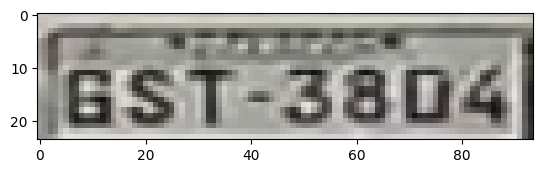

In [34]:
import cv2
import numpy as np
import onnxruntime as ort

# Leer y preprocesar imagen
#img = cv2.imread('test.jpg')
img = img_placa
img = cv2.resize(img, (94, 24))
plt.imshow(img)

# Convertir a float32 y normalizar
img = img.astype(np.float32) / 255.0

# Reordenar dimensiones si es necesario (ej: HWC -> CHW)
img = np.transpose(img, (2, 0, 1))  # De (H, W, C) a (C, H, W) si el modelo lo requiere

# Añadir dimensión batch
img = np.expand_dims(img, axis=0)  # De (C, H, W) a (1, C, H, W)

# Crear sesión ONNX y correr inferencia
session = ort.InferenceSession("lprnet.onnx", providers=["CPUExecutionProvider"])
outputs = session.run(None, {"input": img})

labels, pred_labels = decode(outputs[0], CHARS)
print('PlACA: '+ labels[0])